こちらはボールを検出する際の色域を検証するためのファイル

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

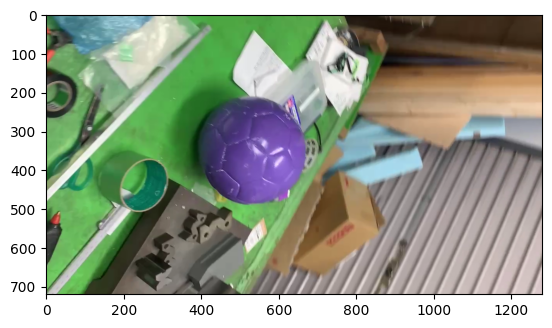

In [10]:
# 画像の読み込み
purple_path = "./images/0bc06fac-purple_00036.png"
blue_path = "./images/04e0c1aa-MOV_0455_00077.png"
red_path = "./images/9fdf45b6-red_00044.png"

image = cv2.imread(purple_path)
# 画像の表示
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

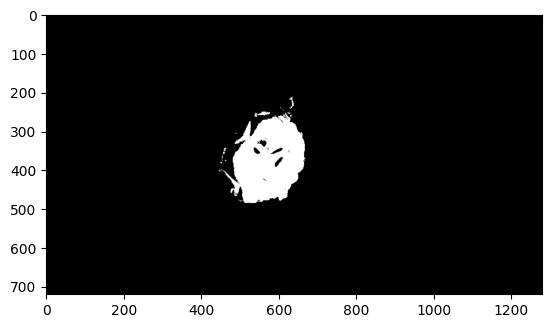

In [11]:
# 色域を設定 0~360の範囲で指定
red = [320, 20]
purple = [260, 300]
blue = [180, 260]

def func(color):
  def is_color(region):
    if color[0] < color[1]:
        return (region >= int(color[0]/360*255)) & (region < int(color[1]/360*255)) # 下限より大きく，上限より小さいときTrue
    else:
        return (region >= int(color[0]/360*255)) | (region < int(color[1]/360*255)) # 上限より大きいか，下限より小さいときTrue
  return is_color

my_func = func(purple)

# rgbをhsvに変換 h:色相 s:彩度 v:明度
frame_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV_FULL)
image_h = frame_hsv[:, :, 0]
_, frame_s = cv2.threshold(frame_hsv[:, :, 1], 0, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
_, frame_v = cv2.threshold(frame_hsv[:, :, 2], 0, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
image_h[(frame_s == 0) | (frame_v == 0)] = 0

mask = image_h.copy()
mask[my_func(mask) == False] = 0 # 条件に合致しない領域を黒にする
# 値が0でない部分を255にする
mask[mask != 0] = 255
# 画像の表示
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))